In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_groq import ChatGroq

from IPython.display import Image, display

import os
from dotenv import load_dotenv

In [9]:
# Load .env file
load_dotenv()

# Initialize State 
class State(TypedDict):
    messages: Annotated[list, add_messages]

### LLMs

In [10]:
# LLMs
llm_google = ChatGoogleGenerativeAI(model='gemini-2.5-flash-lite')
llm_groq = ChatGroq(model='llama3-8b-8192')

llm = llm_google # Set default llm

In [11]:

# Chatbot
def chatbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

### GRAPH

In [12]:
'''
BUUILDING THE GRAPH
'''
graph_builder = StateGraph(State)

# Nodes
graph_builder.add_node("chat", chatbot)

# Edges
graph_builder.add_edge(START, "chat")
graph_builder.add_edge("chat", END)

# Compile
graph = graph_builder.compile()

### Visualize Graph

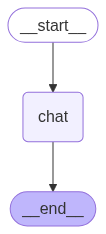

In [ ]:
def display_graph():
    try:
        display(Image(graph.get_graph().draw_mermaid_png()))
    except Exception as e:
        print(f"Error displaying graph: {e}")

display_graph()


### Execute

In [ ]:
response = graph.invoke({"messages": "Hey Google!"})
print(response['messages'][-1])

{'messages': [HumanMessage(content='Hey Google!', additional_kwargs={}, response_metadata={}, id='90805133-49bb-4797-b754-200dec24b780'), AIMessage(content='Hello there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--80d4399f-7d1d-48b5-8224-540428766104-0', usage_metadata={'input_tokens': 4, 'output_tokens': 10, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})]}


In [ ]:
print(response['messages'][-1].content)

content='Hello there! How can I help you today?' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []} id='run--80d4399f-7d1d-48b5-8224-540428766104-0' usage_metadata={'input_tokens': 4, 'output_tokens': 10, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}}
